IMPORT PACKAGES

In [1]:
# Import needed libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, make_scorer

from plotly.offline import iplot
import plotly as py
import plotly.tools as tls

import pickle

LOAD THE DATASET

In [2]:
df=pd.read_excel('cleaned_pone_with_inactive.xlsx')
df.head(10)

,Feeding (X),Feeding (Y),Feeding (Z),Lying (X),Lying (Y),Lying (Z),Standing (X),Standing (Y),Standing (Z),Lying down (X),...,Standing up (X),Standing up (Y),Standing up (Z),Normal walking (X),Normal walking (Y),Normal walking (Z),Active walking (X),Active walking (Y),Active walking (Z),Animal Behavior
0,-0.8,0.2,0.2,-0.1,0.3,-0.6,-0.8,0.0,0.4,-0.5,...,-0.3,0.7,-1.0,-0.1,0.2,-0.1,-0.4,0.3,-1.2,Inactive
1,-0.9,0.1,0.2,-0.1,0.3,-0.6,-0.8,0.0,0.4,0.7,...,1.3,-1.6,-0.1,-0.3,-0.1,-0.5,-0.3,2.3,0.3,Inactive
2,-0.9,0.0,0.3,-0.1,0.3,-0.6,-0.8,0.0,0.4,0.6,...,2.4,-2.0,0.7,0.0,-0.4,0.1,0.5,1.7,-0.3,Inactive
3,-0.8,-0.1,0.4,-0.1,0.3,-0.6,-0.8,0.0,0.4,1.8,...,-2.1,0.3,-0.6,-0.4,0.0,0.4,-1.3,1.3,2.5,Inactive
4,-1.1,-0.2,0.5,-0.1,0.3,-0.6,-0.8,0.0,0.4,-1.8,...,1.1,0.6,1.3,0.5,-0.7,-0.2,2.6,2.5,0.2,Inactive
5,-0.8,0.1,0.3,-0.1,0.3,-0.6,-0.8,0.0,0.4,-0.3,...,0.2,1.1,-0.6,0.3,-0.5,0.4,-0.4,0.8,0.6,Inactive
6,-0.8,0.1,0.3,-0.1,0.3,-0.6,-0.8,0.0,0.4,-0.2,...,1.5,1.8,3.0,0.5,0.0,0.7,-2.8,0.8,-0.3,Active
7,-0.8,0.1,0.3,-0.1,0.3,-0.6,-0.8,0.0,0.4,0.0,...,1.3,0.0,-0.5,0.1,1.0,0.0,-0.4,0.7,-1.1,Active
8,-0.8,0.1,0.3,-0.1,0.3,-0.6,-0.8,0.0,0.4,-1.2,...,-0.3,-2.4,0.1,0.6,0.2,0.5,2.4,1.6,-1.8,Active
9,-0.8,0.1,0.3,-0.1,0.3,-0.6,-0.8,-0.1,0.4,0.5,...,1.1,-1.4,1.4,0.3,-0.7,1.1,-2.2,1.1,2.3,Active


In [3]:
df.shape    

(4434, 22)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4434 entries, 0 to 4433
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Feeding (X)         3684 non-null   float64
 1   Feeding (Y)         3684 non-null   float64
 2   Feeding (Z)         3684 non-null   float64
 3   Lying (X)           4392 non-null   float64
 4   Lying (Y)           4392 non-null   float64
 5   Lying (Z)           4392 non-null   float64
 6   Standing (X)        2712 non-null   float64
 7   Standing (Y)        2712 non-null   float64
 8   Standing (Z)        2712 non-null   float64
 9   Lying down (X)      1962 non-null   float64
 10  Lying down (Y)      1962 non-null   float64
 11  Lying down (Z)      1962 non-null   float64
 12  Standing up (X)     1824 non-null   float64
 13  Standing up (Y)     1824 non-null   float64
 14  Standing up (Z)     1824 non-null   float64
 15  Normal walking (X)  4434 non-null   float64
 16  Normal

In [5]:
df.describe()

,Feeding (X),Feeding (Y),Feeding (Z),Lying (X),Lying (Y),Lying (Z),Standing (X),Standing (Y),Standing (Z),Lying down (X),...,Lying down (Z),Standing up (X),Standing up (Y),Standing up (Z),Normal walking (X),Normal walking (Y),Normal walking (Z),Active walking (X),Active walking (Y),Active walking (Z)
count,3684.000000,3684.000000,3684.000000,4392.000000,4392.000000,4392.000000,2712.000000,2712.000000,2712.000000,1962.000000,...,1962.000000,1824.000000,1824.000000,1824.000000,4434.000000,4434.000000,4434.000000,3102.000000,3102.000000,3102.000000
mean,-0.814577,0.011971,0.307438,-0.039754,0.241803,-0.621015,-0.829351,0.035472,0.290339,-0.018349,...,-0.018196,0.014419,0.026974,0.004002,-0.007285,0.013329,-0.006834,-0.015184,-0.012766,-0.037943
std,0.058321,0.119827,0.078154,0.053353,0.104537,0.043451,0.070157,0.118716,0.076936,1.011842,...,1.001921,0.974550,1.010839,1.021685,0.495646,0.501813,0.496590,1.494618,1.525035,1.505589
min,-2.000000,-2.600000,-0.100000,-1.300000,-0.500000,-0.900000,-1.800000,-1.000000,-0.500000,-3.900000,...,-3.500000,-3.300000,-3.600000,-3.600000,-1.800000,-1.700000,-2.100000,-6.000000,-7.600000,-5.200000
25%,-0.800000,0.000000,0.300000,-0.100000,0.200000,-0.600000,-0.900000,0.000000,0.200000,-0.700000,...,-0.700000,-0.625000,-0.700000,-0.700000,-0.300000,-0.300000,-0.300000,-1.000000,-1.000000,-1.000000
50%,-0.800000,0.000000,0.300000,0.000000,0.300000,-0.600000,-0.800000,0.000000,0.300000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-0.800000,0.100000,0.300000,0.000000,0.300000,-0.600000,-0.800000,0.100000,0.300000,0.675000,...,0.600000,0.700000,0.700000,0.700000,0.300000,0.300000,0.300000,1.000000,1.000000,1.000000
max,0.000000,0.700000,1.100000,0.500000,0.600000,-0.500000,-0.100000,1.100000,0.700000,3.400000,...,3.200000,3.200000,3.200000,3.400000,1.700000,1.600000,1.900000,4.700000,4.700000,5.200000


In [6]:
df.isnull().sum()

Feeding (X)            750
Feeding (Y)            750
Feeding (Z)            750
Lying (X)               42
Lying (Y)               42
Lying (Z)               42
Standing (X)          1722
Standing (Y)          1722
Standing (Z)          1722
Lying down (X)        2472
Lying down (Y)        2472
Lying down (Z)        2472
Standing up (X)       2610
Standing up (Y)       2610
Standing up (Z)       2610
Normal walking (X)       0
Normal walking (Y)       0
Normal walking (Z)       0
Active walking (X)    1332
Active walking (Y)    1332
Active walking (Z)    1332
Animal Behavior          0
dtype: int64

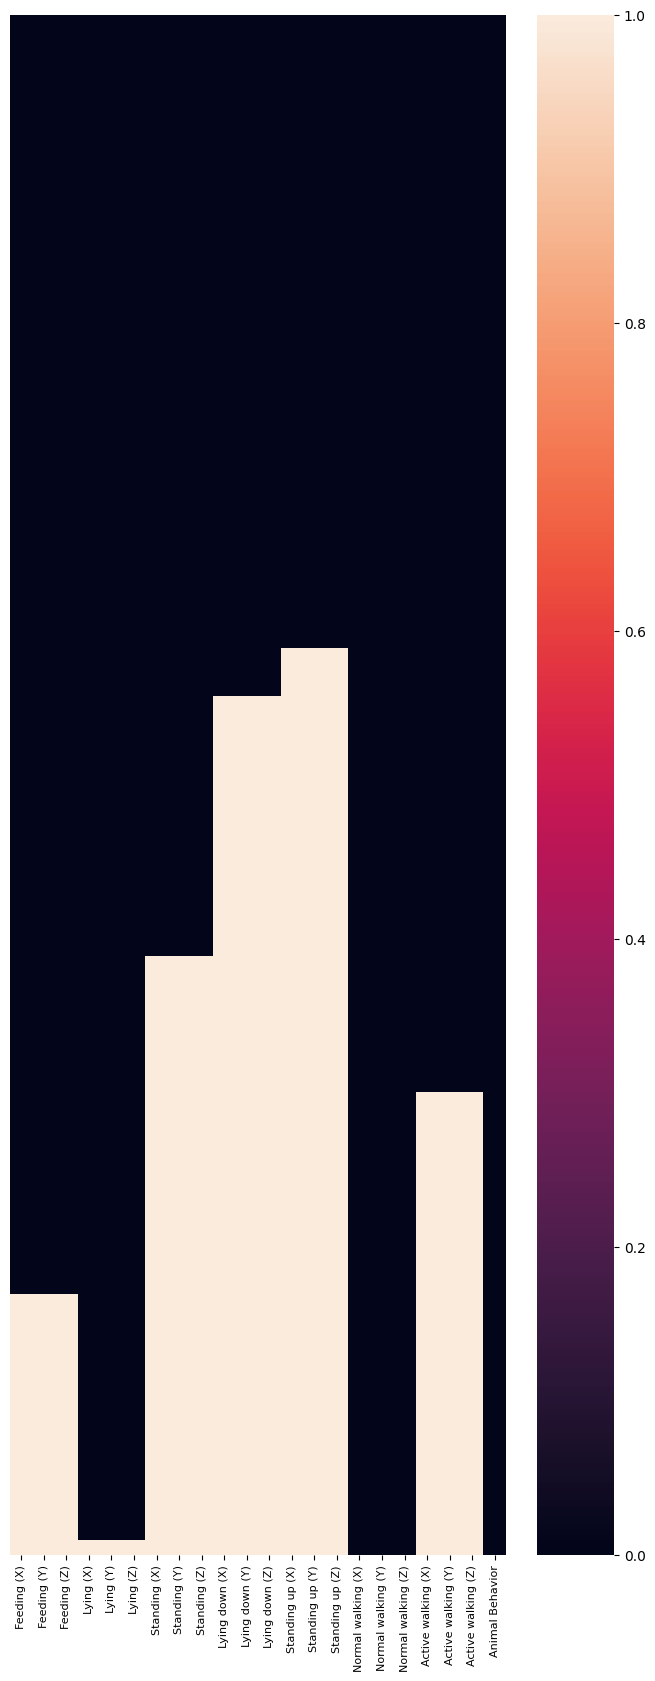

In [7]:
# PLOTTING HEATMAP AGAIN TO VISUALIZE AND CHECK OUR DATA CLEANSING

plt.figure(figsize=(8,20))
sns.heatmap(df.isnull(), yticklabels = False)
plt.xticks(rotation=90)
plt.tick_params(labelsize=8)
plt.show()

In [8]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
df['Animal Behavior']=lab.fit_transform(df['Animal Behavior'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4434 entries, 0 to 4433
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Feeding (X)         3684 non-null   float64
 1   Feeding (Y)         3684 non-null   float64
 2   Feeding (Z)         3684 non-null   float64
 3   Lying (X)           4392 non-null   float64
 4   Lying (Y)           4392 non-null   float64
 5   Lying (Z)           4392 non-null   float64
 6   Standing (X)        2712 non-null   float64
 7   Standing (Y)        2712 non-null   float64
 8   Standing (Z)        2712 non-null   float64
 9   Lying down (X)      1962 non-null   float64
 10  Lying down (Y)      1962 non-null   float64
 11  Lying down (Z)      1962 non-null   float64
 12  Standing up (X)     1824 non-null   float64
 13  Standing up (Y)     1824 non-null   float64
 14  Standing up (Z)     1824 non-null   float64
 15  Normal walking (X)  4434 non-null   float64
 16  Normal

In [10]:
df=df.fillna(df.mean())

In [27]:
df.head(150)

,Feeding (X),Feeding (Y),Feeding (Z),Lying (X),Lying (Y),Lying (Z),Standing (X),Standing (Y),Standing (Z),Lying down (X),...,Standing up (X),Standing up (Y),Standing up (Z),Normal walking (X),Normal walking (Y),Normal walking (Z),Active walking (X),Active walking (Y),Active walking (Z),Animal Behavior
0,-0.8,0.2,0.2,-0.1,0.3,-0.6,-0.8,0.0,0.4,-0.5,...,-0.3,0.7,-1.0,-0.1,0.2,-0.1,-0.4,0.3,-1.2,3
1,-0.9,0.1,0.2,-0.1,0.3,-0.6,-0.8,0.0,0.4,0.7,...,1.3,-1.6,-0.1,-0.3,-0.1,-0.5,-0.3,2.3,0.3,3
2,-0.9,0.0,0.3,-0.1,0.3,-0.6,-0.8,0.0,0.4,0.6,...,2.4,-2.0,0.7,0.0,-0.4,0.1,0.5,1.7,-0.3,3
3,-0.8,-0.1,0.4,-0.1,0.3,-0.6,-0.8,0.0,0.4,1.8,...,-2.1,0.3,-0.6,-0.4,0.0,0.4,-1.3,1.3,2.5,3
4,-1.1,-0.2,0.5,-0.1,0.3,-0.6,-0.8,0.0,0.4,-1.8,...,1.1,0.6,1.3,0.5,-0.7,-0.2,2.6,2.5,0.2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,-0.8,0.0,0.4,-0.1,0.3,-0.6,-0.8,0.0,0.3,0.7,...,1.3,0.1,0.1,0.1,0.1,0.0,0.9,1.7,-1.3,3
146,-0.8,0.0,0.4,-0.1,0.3,-0.6,-0.8,0.2,0.2,-0.9,...,1.8,-1.6,0.2,1.1,0.1,-1.2,-1.0,0.8,0.7,0
147,-0.8,0.0,0.4,-0.1,0.3,-0.6,-1.8,1.1,-0.2,0.1,...,1.2,3.2,-0.6,0.1,0.3,-0.6,-1.0,2.4,1.9,2
148,-0.8,0.0,0.4,-0.1,0.3,-0.6,-0.8,0.0,0.4,-1.0,...,0.0,0.5,0.2,0.3,-0.2,0.3,-0.9,-0.2,0.7,3


In [11]:
df.isnull().sum()

Feeding (X)           0
Feeding (Y)           0
Feeding (Z)           0
Lying (X)             0
Lying (Y)             0
Lying (Z)             0
Standing (X)          0
Standing (Y)          0
Standing (Z)          0
Lying down (X)        0
Lying down (Y)        0
Lying down (Z)        0
Standing up (X)       0
Standing up (Y)       0
Standing up (Z)       0
Normal walking (X)    0
Normal walking (Y)    0
Normal walking (Z)    0
Active walking (X)    0
Active walking (Y)    0
Active walking (Z)    0
Animal Behavior       0
dtype: int64

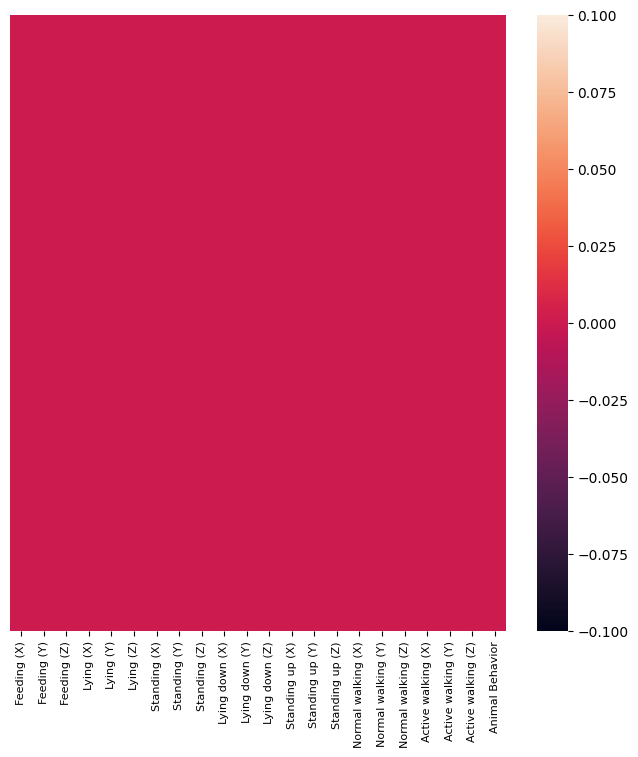

In [12]:
plt.figure(figsize=(8,8))
sns.heatmap(df.isnull(), yticklabels = False)
plt.xticks(rotation=90)
plt.tick_params(labelsize=8)
plt.show()

In [13]:
X=df[['Feeding (X)','Feeding (Y)','Feeding (Z)','Lying (X)','Lying (Y)','Lying (Z)','Standing (X)','Standing (Y)','Standing (Z)','Lying down (X)','Lying down (Y)','Lying down (Z)','Standing up (X)','Standing up (Y)','Standing up (Z)','Normal walking (X)','Normal walking (Y)','Normal walking (Z)','Active walking (X)','Active walking (Y)','Active walking (Z)']]

In [14]:
Y=df['Animal Behavior']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [16]:
model=DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train)
model.predict(X_test)
model.score(X_test,y_test)

0.9977452085682075

In [17]:
forest=RandomForestClassifier(n_estimators=10,random_state=42)
forest.fit(X_train,y_train)
forest.predict(X_test)
forest.score(X_test,y_test)


0.9977452085682075

In [18]:
boost=AdaBoostClassifier(random_state=1)
boost.fit(X_train,y_train)
boost.predict(X_test)
boost.score(X_test,y_test)


0.979706877113867

In [19]:
bag=BaggingClassifier(n_estimators=10, random_state=42)
bag.fit(X_train,y_train)
bag.predict(X_test)
bag.score(X_test,y_test)

0.9977452085682075

In [20]:
gb=GradientBoostingClassifier(random_state=1)
gb.fit(X_train,y_train)
gb.predict(X_test)
gb.score(X_test,y_test)

1.0

In [21]:
neighbors=KNeighborsClassifier(n_neighbors=5)
neighbors.fit(X_train,y_train)
neighbors.predict(X_test)
neighbors.score(X_test,y_test)

0.8038331454340474

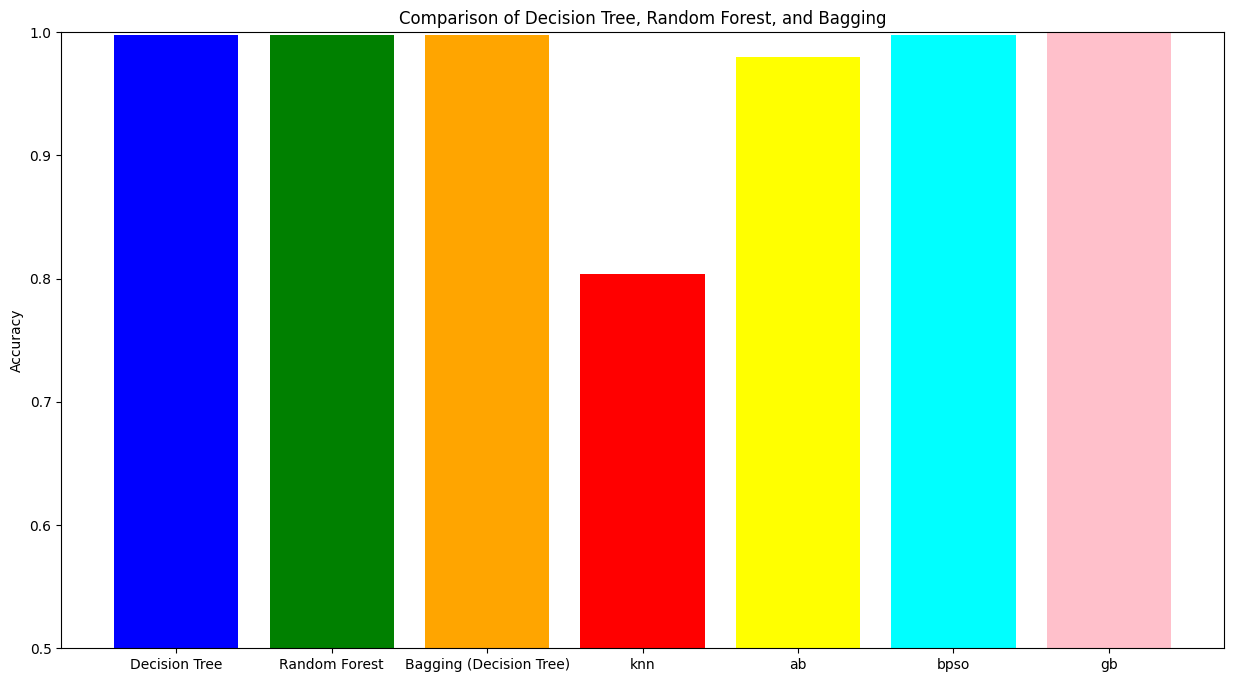

In [22]:
classifiers = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=10, random_state=42),
    "Bagging (Decision Tree)": BaggingClassifier(n_estimators=10, random_state=42),
    "knn": KNeighborsClassifier( n_neighbors=5),
    "ab" : AdaBoostClassifier(random_state = 1),
    "bpso": BaggingClassifier(),
    "gb": GradientBoostingClassifier(random_state = 1)

}

# Train and evaluate models
accuracy_results = {}
for name, model in classifiers.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[name] = accuracy

# Plot results
plt.figure(figsize=(15, 8))
plt.bar(accuracy_results.keys(), accuracy_results.values(), color=['blue', 'green', 'orange','red','yellow','cyan','pink'])
plt.ylim(0.5, 1.0)  # Set y-axis range
plt.ylabel("Accuracy")
plt.title("Comparison of Decision Tree, Random Forest, and Bagging")
plt.show()


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df)
SEQ_LENGTH = 10  


X, Y = [], []
for i in range(len(data_scaled) - SEQ_LENGTH):
    X.append(data_scaled[i : i + SEQ_LENGTH])
    Y.append(data_scaled[i + SEQ_LENGTH])

X, Y = np.array(X), np.array(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(SEQ_LENGTH, X.shape[2])),
    LSTM(50, activation='relu'),
    Dense(Y.shape[1])
])

model.compile(optimizer='adam', loss='mse')

model.fit(X_train, Y_train, epochs=20, batch_size=32, validation_data=(X_test, Y_test))

Y_pred = model.predict(X_test)

r2 = r2_score(Y_test, Y_pred)
print(f"R-squared score: {r2}")

model.save("/mnt/data/rnn_model.h5")

print("Model training complete and saved as rnn_model.h5")


Epoch 1/20


C:\Users\SRINIVASAN\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



111/111 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.1792 - val_loss: 0.0148
Epoch 2/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0146 - val_loss: 0.0145
Epoch 3/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0144 - val_loss: 0.0144
Epoch 4/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0141 - val_loss: 0.0144
Epoch 5/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0140 - val_loss: 0.0143
Epoch 6/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0140 - val_loss: 0.0141
Epoch 7/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0138 - val_loss: 0.0141
Epoch 8/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0136 - val_loss: 0.0139
Epoch 9/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0140 - val_loss: 0.0139
Epoch 10/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0136 - val_loss: 0.0139
Epoch 11/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0138 - val_loss: 0.0141
Epoch 12/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/ste

NameError: name 'r2_score' is not defined

In [ ]:
df.columns

Index(['Feeding (X)', 'Feeding (Y)', 'Feeding (Z)', 'Lying (X)', 'Lying (Y)',
       'Lying (Z)', 'Standing (X)', 'Standing (Y)', 'Standing (Z)',
       'Lying down (X)', 'Lying down (Y)', 'Lying down (Z)', 'Standing up (X)',
       'Standing up (Y)', 'Standing up (Z)', 'Normal walking (X)',
       'Normal walking (Y)', 'Normal walking (Z)', 'Active walking (X)',
       'Active walking (Y)', 'Active walking (Z)', 'Animal Behavior'],
      dtype='object')

In [ ]:
Feeding1=float(input('Feeding (X):'))
Feeding2=float(input('Feeding (y) :'))
Feeding3=float(input('Feeding (z) :'))
Lying1=float(input('Lying (X) :'))
Lying2=float(input('Lying (y) :'))
Lying3=float(input('Lying (z) :'))
Standing1=float(input('Standing (X):'))
Standing2=float(input('Standing (y):'))
Standing3=float(input('Standing (z):'))
Lyingdown1=float(input('Lying down (X) :'))
Lyingdown2=float(input('Lying down (y) :'))
Lyingdown3=float(input('Lying down (z) :'))
Standingup1=float(input('Standing up (X) :'))
Standingup2=float(input('Standing up (y) :'))
Standingup3=float(input('Standing up (z) :'))
Normalwalking1=float(input('Normal walking (X) :'))
Normalwalking2=float(input('Normal walking (y) :'))
Normalwalking3=float(input('Normal walking (z) :'))
Activewalking1=float(input('Active walking (X) :'))
Activewalking2=float(input('Active walking (y) :'))
Activewalking3=float(input('Active walking (z) :'))
data=[['Feeding1','Feeding2','Feeding3','Lying1','Lying2','Lying3','Standing1','Standing2','Standing3','Lyingdown1','Lyingdown1','Lyingdown3','Standingup1','Standingup2','Standingup3','Normalwalking1','Normalwalking2','Normalwalking3','Activewalking1','Activewalking2','Activewalking3']]


ValueError: could not convert string to float: 'd'

In [ ]:
print('New Dataset:',data)

In [ ]:
New_prediction=model.predict(data)
print('new prediction:',New_prediction)